In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# loading ipl matches dataset
ipl=pd.read_csv('matches.csv')

In [3]:
# having a glance at first 5 records of dataset
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# looking at number of rows and columns in the dataset
ipl.shape

(756, 18)

In [5]:
# retrieving the frequency of most man of the match awards
ipl.value_counts('player_of_match')

player_of_match
CH Gayle           21
AB de Villiers     20
MS Dhoni           17
DA Warner          17
RG Sharma          17
                   ..
KMDN Kulasekara     1
KK Cooper           1
K Rabada            1
K Paul              1
Z Khan              1
Length: 226, dtype: int64

In [6]:
# retrieving the frequency of top 10 most man of the match awards
ipl.value_counts('player_of_match')[0:10]

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
dtype: int64

In [7]:
# retrieving the frequency of top 5 most man of the match awards
ipl.value_counts('player_of_match')[0:5]

player_of_match
CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
dtype: int64

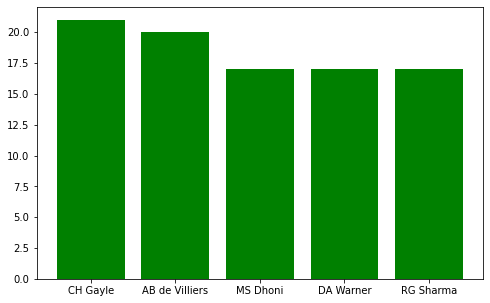

In [9]:
plt.figure(figsize=(8,5))
plt.bar(list(ipl.value_counts('player_of_match')[0:5].keys()),list(ipl.value_counts('player_of_match')[0:5]),color='g')
plt.show()

In [10]:
ipl.value_counts('result')

result
normal       743
tie            9
no result      4
dtype: int64

In [11]:
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [12]:
# exrtacting teams which won after choosing to bat first
batting_first=ipl[ipl['win_by_runs']!=0]

In [15]:
batting_first['team1'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Royal Challengers Bangalore    35
Kolkata Knight Riders          35
Sunrisers Hyderabad            31
Rajasthan Royals               27
Delhi Daredevils               27
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: team1, dtype: int64

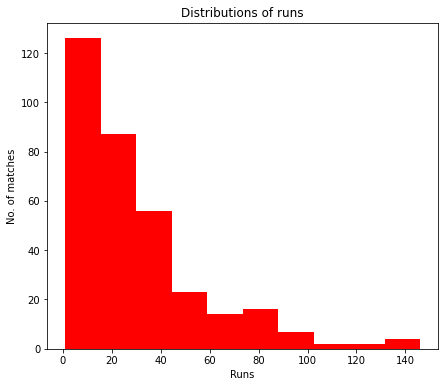

In [29]:
plt.figure(figsize=(7,6))
plt.xlabel('Runs')
plt.title('Distributions of runs')
plt.ylabel('No. of matches')
plt.hist(batting_first['win_by_runs'],color='red')
plt.show()

In [30]:
# finding out number of wins for each team with respect first batting
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

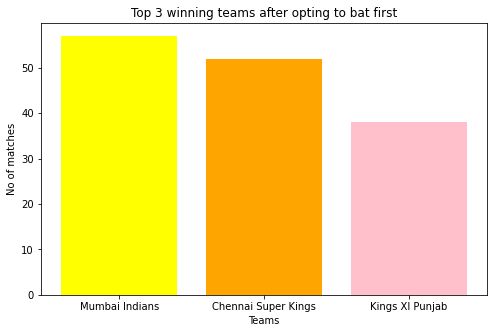

In [52]:
# making bar plot of top 3 most winning teams after first batting
plt.figure(figsize=(8,5))
plt.bar(list(batting_first['winner'].value_counts()[:3].keys()),list(batting_first['winner'].value_counts()[:3]),color=['yellow','orange','pink'])
plt.title("Top 3 winning teams after opting to bat first")
plt.xlabel("Teams")
plt.ylabel("No of matches")
plt.show()

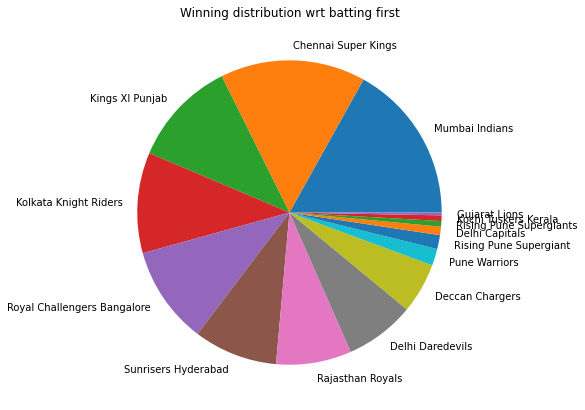

In [60]:
# piechart for the winning wrt batting first
plt.figure(figsize=(8,7))
plt.pie(batting_first['winner'].value_counts(),labels=batting_first['winner'].value_counts().keys())
plt.title("Winning distribution wrt batting first")
plt.show()

In [66]:
# teams won after opting to bat second
batting_second=ipl[ipl['win_by_wickets']!=0]

In [67]:
# looking at the tail
batting_second.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
750,11346,2019,Mohali,05/05/19,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


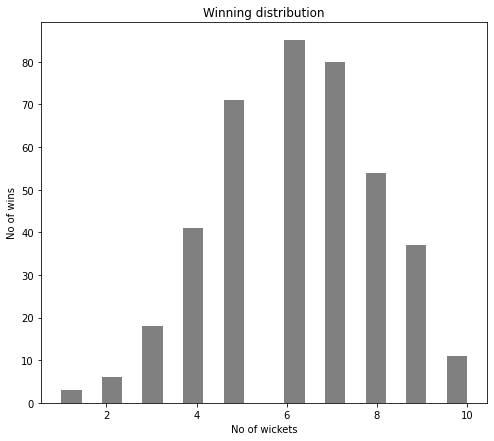

In [83]:
# making a histogram for frequency of wins wrt wickets
plt.figure(figsize=(8,7))
plt.hist(batting_second['win_by_wickets'],color='grey',bins=20)
plt.title("Winning distribution")
plt.xlabel("No of wickets")
plt.ylabel("No of wins")
plt.show()

In [76]:
# finding out frequency of wins wrt each team after second batting
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

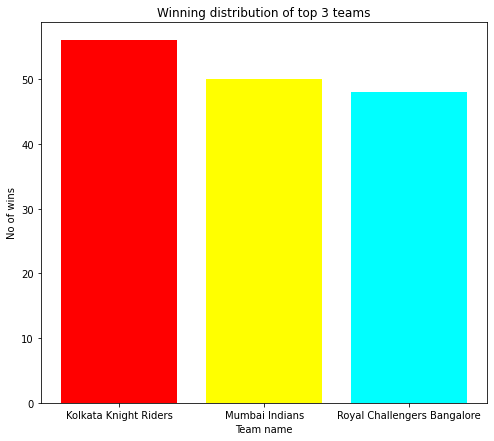

In [86]:
# barplot of top 3 teams with most wins after batting second
plt.figure(figsize=(8,7))
plt.xlabel("Team name")
plt.ylabel("No of wins")
plt.title("Winning distribution of top 3 teams")
plt.bar(batting_second['winner'].value_counts()[:3].keys(),batting_second['winner'].value_counts()[:3],color=['red','yellow','cyan'])
plt.show()

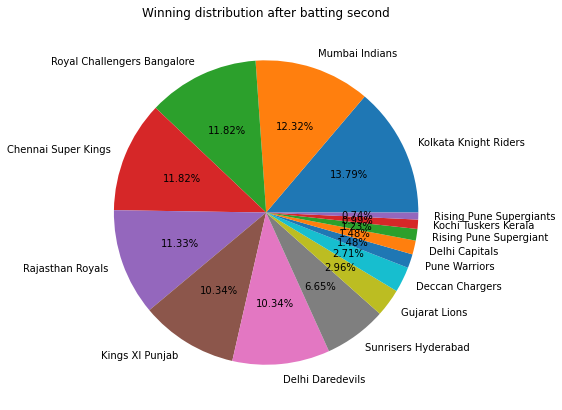

In [92]:
# piechart for winnig distribution after batting second
plt.figure(figsize=(9,7))
plt.title("Winning distribution after batting second")
plt.pie(batting_second['winner'].value_counts(),labels=batting_second['winner'].value_counts().keys(),autopct="%0.2f%%")
plt.show()

In [91]:
# looking at number of matches played at each season
ipl['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2015    59
2017    59
2008    58
2009    57
Name: season, dtype: int64

In [93]:
# looking at matches played in each city
ipl.value_counts('city')

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Cuttack             7
Ranchi              7
Abu Dhabi           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
dtype: int64

In [97]:
# finding out how many times a team has won the match after winning the toss
ipl[ipl['toss_winner']==ipl['winner']]['winner'].value_counts()

Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    41
Kings XI Punjab                35
Delhi Daredevils               35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Pune Warriors                   3
Name: winner, dtype: int64

In [105]:
np.sum(ipl['toss_winner']==ipl['winner'])/ipl.shape[0]


0.5198412698412699

In [119]:
deliveries=pd.read_csv('deliveries.csv')

In [120]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [122]:
deliveries['match_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [128]:
match_1=deliveries[deliveries['match_id']==1]

In [129]:
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [130]:
match_1.shape

(248, 21)

In [136]:
srh=match_1[match_1['inning']==1]

In [137]:
srh.shape

(125, 21)

In [138]:
srh.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [139]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
2     9
6     9
3     1
Name: batsman_runs, dtype: int64

In [140]:
srh['batsman'].value_counts()

MC Henriques    37
S Dhawan        31
Yuvraj Singh    30
DJ Hooda        12
DA Warner        9
BCJ Cutting      6
Name: batsman, dtype: int64

In [141]:
np.sum(srh['batsman_runs'])

200

In [143]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [148]:
rcb=match_1[match_1['inning']==2]

In [149]:
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [150]:
rcb['dismissal_kind'].value_counts()

caught     6
run out    2
bowled     2
Name: dismissal_kind, dtype: int64